# Data Analysis

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv("kc_house_data.csv")
print(df.shape)
pd.set_option('display.max_columns', None)
df.head()

(21613, 21)


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [69]:
print(df.columns) # id useless ? Peut être aussi date, sqft_lot15 / living | Moyen de faire autrement que lattitude & longitude ?

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [70]:
df.isnull().sum() # => No missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [71]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

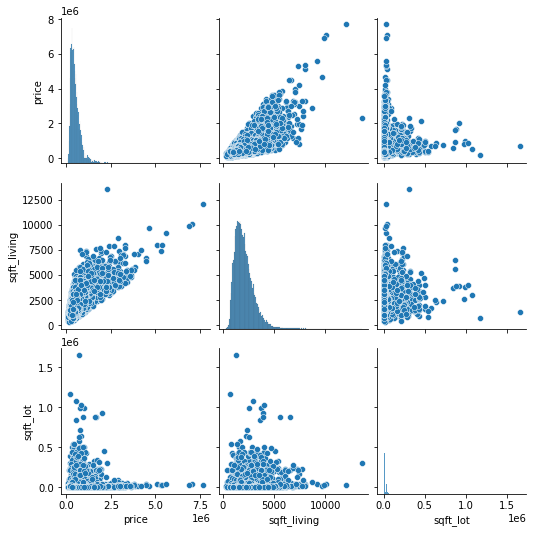

In [72]:
sns.pairplot(data = df, vars=['price', 'sqft_living', 'sqft_lot'])

In [73]:
# Pairplot price w/ everything

<AxesSubplot:>

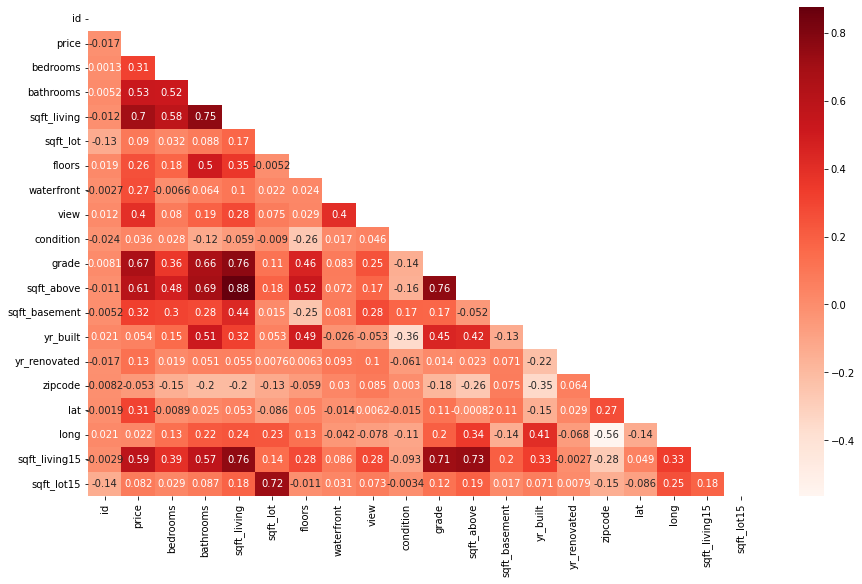

In [74]:
# Find correlations
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(15, 9))

sns.heatmap(df.corr(), cmap='Reds', mask=mask, annot=True)

In [75]:
def mapbox(color, df=df):
  if color=="zipcode":
    df["zipcode"] = df["zipcode"].astype("str")
  elif color =="log_price":
    color = np.log(df.price)

  fig = px.scatter_mapbox(df, lat=df.lat, lon=df.long, mapbox_style="open-street-map", color=color)#np.log(df.price))
  return fig.show()

In [76]:
mapbox(color="zipcode")

In [77]:
mapbox(color="log_price")

## Value repartition

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype

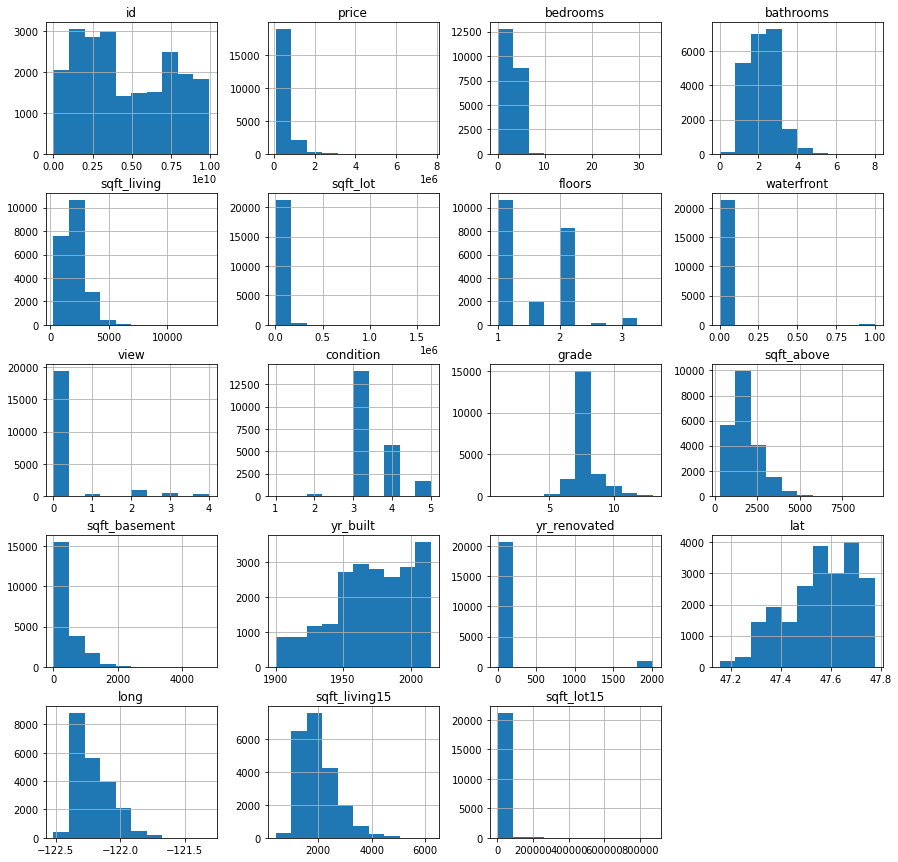

In [78]:
df.hist(figsize=(15, 15))

In [79]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Feature Engineering

## Remove columns

Other columns actually might also be useless, but we want to keep them in order to experiment with and without them in our model.

I'm thinking of: *sqft_lot* (which is the sum of *sqft_living* and *sqft_basement*), *sqft_lot15*, *sqft_living15* (which is very correlated with sqft_living), *lat*, *long* and eventually *yr_built*

In [80]:
df.drop(['id', 'date'], axis=1, inplace=True)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Remove outliers

In [81]:
df.drop(df.index[df.sqft_living == df.sqft_living.max()], inplace=True)

### Outliers in space
Some values seem very alone when we plot them on a map. Let's remove them so they don't break our whole lat and long features.

In [82]:
long_outliers_mask = df["long"] > -121.691
mapbox("price", df[long_outliers_mask])

In [83]:
df.drop(df.index[long_outliers_mask], axis=0, inplace=True)

In [84]:
mapbox("log_price")

## What should we change in our pipeline ?

### Should we change some values to log ?


Interesting columns are : ["sqft_living", "sqft_lot", "sqft_above", "sqft_living15", "sqft_lot15", "price"]

We can see the original (log normal) repartitions in our [value repartition plot](#value-repartition).

The goal of the log scale is to give those columns who have a **log normal** distribution a **normal** distribution, which will be easier to process.

Text(0.5, 1.0, 'Square feet of the living area (log scale)')

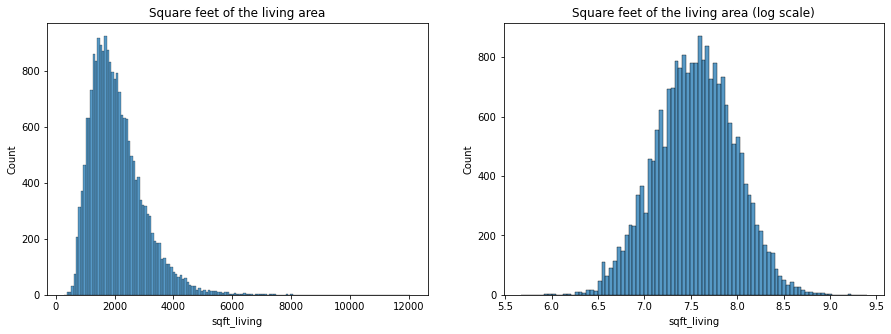

In [85]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(data=df["sqft_living"], ax=axs[0]).set_title("Square feet of the living area")
sns.histplot(data=np.log(df["sqft_living"]), ax=axs[1]).set_title("Square feet of the living area (log scale)")

## Values that need to be changed outside of the pipeline

### Change the yr_renovated column
We want to change the 0's in this column to the year the house was built.

In [86]:
df["yr_renovated"] = df[["yr_built", "yr_renovated"]].max(axis=1)

In [87]:
df["yr_renovated"]

0        1955
1        1991
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_renovated, Length: 21593, dtype: int64

# Save the modified dataset

In [88]:
df.to_csv('kc_house_data_clean.csv', index=False)